## Salarios de la CCSS para julio del 2023

Puedes encontrar estos datos actualizados en el siguiente link https://www.ccss.sa.cr/datos-abiertos-salarios

El salario se expresa en montos brutos, es decir, antes de impuestos y rebajas

El proposito de este notebook es analisar como se distribuyen los salarios de la CCSS por puesto y cuales son los rangos salariales esperados que puede tener un nuevo empleado

El notebook consta de dos partes

1) La transformacion y limpieza de los datos

2) El analisis de dichos datos

## Limpieza y Transformacion de los datos

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Cargamos los datos
df = pd.read_csv('C:/Users/Usuario/Documents/PortafolioDS/DATA/ccss_salarios.csv', sep=';')
df

,rrhh_sal_id,rrhh_sal_nombre,rrhh_sal_puesto,rrhh_sal_salario
0,112100832.0,Abimeleth Madiam Salvatierra Navarro,TRAB.SERV.GENERALES,"₡0,00"
1,503790132.0,Adilia De Los Angeles Espinoza Sanchez,AUX. DE ENFERMERIA,"₡0,00"
2,602650527.0,Adolfo Bojorge Zuñiga,ENFERMERA 3 LICENC.,"₡0,00"
3,110840574.0,Adrian Rodriguez Melendez,MED ASISTENTE GRAL,"₡0,00"
4,116040837.0,Adrian Esteban Gomez Araya,TEC.RADIOL.DIPLMADO,"₡0,00"
...,...,...,...,...
64032,402060990.0,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"₡8.086.858,44"
64033,114710251.0,Nicole Binda Muñoz,MED ESP EN SER SOC,"₡8.813.621,10"
64034,205290958.0,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"₡12.826.245,15"
64035,203910375.0,Maria Rosibel Morales Murillo,MED ASISTENTE GRAL,"₡17.704.294,18"


In [3]:
# Establecemos el estilo de las graficas
sns.set(style = 'darkgrid', context = 'notebook')

In [4]:
df.dtypes

rrhh_sal_id         float64
rrhh_sal_nombre      object
rrhh_sal_puesto      object
rrhh_sal_salario     object
dtype: object

In [5]:
# Cambiamos el nombre de las columnas
df.columns = ['Id','nombre','puesto','salario_colones']

# Eliminamos columnas que no nos interesan
df = df.drop('Id', axis = 1)

# Cambiamos el tipo de dato a string
df['nombre'] = df['nombre'].astype('string')
df['puesto'] = df['puesto'].astype('string')

# Eliminamos los simbolos de colones y eliminamos los caracteres que esten despues de la ','
df['salario_colones'] = df['salario_colones'].str.replace('₡','')
df['salario_colones'] = df['salario_colones'].str.replace('.','').str.split(',').str.get(0).astype('float')

# Establecemos la opción de formato de pandas para separar los miles con comas
pd.options.display.float_format = '{:,.0f}'.format

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14228\939516738.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salario_colones'] = df['salario_colones'].str.replace('.','').str.split(',').str.get(0).astype('float')


In [6]:
df.dtypes

nombre              string
puesto              string
salario_colones    float64
dtype: object

In [7]:
# Cuantos valores nulos tenemos en cada columna
df.isnull().sum()

nombre             1
puesto             1
salario_colones    1
dtype: int64

In [8]:
# Eliminamos los valores nulos
df = df.dropna()
df

,nombre,puesto,salario_colones
0,Abimeleth Madiam Salvatierra Navarro,TRAB.SERV.GENERALES,0
1,Adilia De Los Angeles Espinoza Sanchez,AUX. DE ENFERMERIA,0
2,Adolfo Bojorge Zuñiga,ENFERMERA 3 LICENC.,0
3,Adrian Rodriguez Melendez,MED ASISTENTE GRAL,0
4,Adrian Esteban Gomez Araya,TEC.RADIOL.DIPLMADO,0
...,...,...,...
64031,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769"
64032,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858"
64033,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621"
64034,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245"


In [9]:
# Cuantos registros existen con un salario igual a 0
df[df['salario_colones'] == 0]['salario_colones'].count()

1476

In [10]:
# Eliminamos los valores = 0
df.drop(df[df['salario_colones'] == 0].index, inplace = True)
df = df.reset_index(drop = True)
df

,nombre,puesto,salario_colones
0,Julio Esteban Rodriguez Montoya,GUARDA,37
1,Kevin Mauricio Cascante Murillo,TRAB.SERV.GENERALES,37
2,Magaly De Los Angeles Castro Chinchilla,GUARDA,37
3,Luis Diego Martinez Cascante,CHOFER 2,38
4,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38
...,...,...,...
62555,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769"
62556,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858"
62557,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621"
62558,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245"


In [11]:
# Cuantos puestos tenemos?
df['puesto'].nunique()

429

In [12]:
# Algunos de los puestos
df['puesto'].unique()

<StringArray>
[             'GUARDA', 'TRAB.SERV.GENERALES',            'CHOFER 2',
    'AUX. LAB.CLINICO',      'TEC. DISECCION',  'AUX. DE ENFERMERIA',
 'ASIST. DE PACIENTES',     'TEC. RADIOLOGIA',  'AUXILIAR DE NUTRIC',
  'TRAB. DE PRODUCC.1',
 ...
 'DIR TECN SERV SALUD',     'QUIMICO 2 (PCM)',      'GERENTE ADMTVA',
   'GERENTE LOGISTICA',  'GERENTE FINANCIERA',   'GERENTE PENSIONES',
  'GEREN. INFR.Y TECN',             'AUDITOR',      'GERENTE MEDICO',
 'PRESIDENTE EJECUTIV']
Length: 429, dtype: string

analisar 429 puestos distintos seria una tarea muy tediosa, por lo cual debemos mejorar la agrupacion de estos puestos. Asi podremos analizar por categoria y especialidad o titulo del puesto.

In [13]:
# Creamos dos columnas nuevas a partir del puesto
df[['categoria','titulo']] = df['puesto'].str.split(' ',n=1,expand = True)
df

,nombre,puesto,salario_colones,categoria,titulo
0,Julio Esteban Rodriguez Montoya,GUARDA,37,GUARDA,<NA>
1,Kevin Mauricio Cascante Murillo,TRAB.SERV.GENERALES,37,TRAB.SERV.GENERALES,<NA>
2,Magaly De Los Angeles Castro Chinchilla,GUARDA,37,GUARDA,<NA>
3,Luis Diego Martinez Cascante,CHOFER 2,38,CHOFER,2
4,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38,AUX.,LAB.CLINICO
...,...,...,...,...,...
62555,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769",MED,A ESP PEDIATRIA
62556,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858",MED,A ESP GINECOLOG
62557,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621",MED,ESP EN SER SOC
62558,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245",MED,ASISTENTE GRAL


In [14]:
df['categoria'].unique()

<StringArray>
[             'GUARDA', 'TRAB.SERV.GENERALES',              'CHOFER',
                'AUX.',                'TEC.',              'ASIST.',
            'AUXILIAR',               'TRAB.',      'ASIS.LAB.CLI.2',
    'SECRET.EJECUTIVA',
 ...
 'JEF.SEC.ODONTOLOGIA',                 'SUB', 'SUBG.TECNOLOG.INFOR',
     'DIREC.PROG.SERV',                 'DIR',             'QUIMICO',
             'GERENTE',              'GEREN.',             'AUDITOR',
          'PRESIDENTE']
Length: 201, dtype: string

Ya reducimos la cantidad de pustos a la mitad, pero debido a que estan separados por '.' y espacios podemos volver a aplicar el mismo metodo para ver si logramos reducirlos aun mas

In [15]:
df['categoria'] = df['categoria'].str.split('.', n=1).str.get(0)
df

,nombre,puesto,salario_colones,categoria,titulo
0,Julio Esteban Rodriguez Montoya,GUARDA,37,GUARDA,<NA>
1,Kevin Mauricio Cascante Murillo,TRAB.SERV.GENERALES,37,TRAB,<NA>
2,Magaly De Los Angeles Castro Chinchilla,GUARDA,37,GUARDA,<NA>
3,Luis Diego Martinez Cascante,CHOFER 2,38,CHOFER,2
4,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38,AUX,LAB.CLINICO
...,...,...,...,...,...
62555,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769",MED,A ESP PEDIATRIA
62556,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858",MED,A ESP GINECOLOG
62557,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621",MED,ESP EN SER SOC
62558,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245",MED,ASISTENTE GRAL


In [16]:
# Volvemos a revisar el numero de categorias
print(df['categoria'].nunique())
df['categoria'].unique()

92


array(['GUARDA', 'TRAB', 'CHOFER', 'AUX', 'TEC', 'ASIST', 'AUXILIAR',
       'ASIS', 'SECRET', 'MENSAJERO', 'M', 'BODEGUERO', 'ASISTENTE',
       'ENFERMERA', 'PROFESIONAL', 'MED', 'ODONTOLOGO', 'MICROBIOL',
       'OPERD', 'TECN', 'JEFE', 'OPER', 'ODONT', 'NUTRICIONISTA',
       'OFICINISTA', 'DIPL', 'SECRETARIA', 'PSICOLOGO', 'FARMACEUTICO',
       'AS', 'CAJERO', 'SUPERV', 'BACH', 'MEDICO', 'LIC', 'AUDIOLOGO',
       'TECNICO', 'JEF', 'PROF', 'BODEG', 'OPERAD', 'FARMACEUT',
       'ASISTENT', 'TERAPIST', 'COORD', 'MAE', 'MEC', 'INSP', 'CAPELLAN',
       'ANALIS', 'OPERADOR', 'ANAL', 'PROMOTOR', 'OPTOMETRISTA',
       'TRABAJAD', 'PELUQUERO', 'SUBJEF', 'ODONTOL', 'SUPERVISOR', 'SUP',
       'INSPECTOR', 'ENCARG', 'SEC', 'EDUCADOR', 'FOTOGRAFO', 'CONTADOR',
       'ADMTDOR', 'CONTROLISTA', 'DIPLMAD', 'ACTUARIO', 'OFIC', 'DIPLOM',
       'FISICO', 'ANALIST', 'SUPER', 'ASESOR', 'DIR', 'ADMINIST', 'ENF',
       'P3', 'ASES', 'SUB-ADM', 'JEFSUB', 'DIREC', 'SUBDIRECTOR', 'SUB',
       'SUB

Ya logramos reducir/agrupar los puestos por cateogiras de 429 a 92 separando por espacios y comas, pero aun vemos que existen registros que significan lo mismo pero estan escritos de forma diferente. Como lo es el caso de 'AUX' y 'AUXILIAR'. Por lo cual podemos reducir aun mas el numero de registros que tiene nuestra columna categoria

In [17]:
# Creamos un diccionario de reemplazos con sus claves y valores respectivos
reemplazos = {
    'AUX': 'AUXILIAR',
    'TRAB': 'TRABAJADOR',
    'TEC': 'TECNICO',
    'JEF': 'JEFE',
    'SUP': 'SUPERIVISOR',
    'OFI': 'OFICINISTA',
    'GEREN':'GERENTE',
    'ASIS': 'ASISTENTE',
    'ANAL': 'ANALISTA',
    'OPER': 'OPERADOR',
    'SEC': 'SECRETARIA',
    'ASES': 'ASESOR',
    'ENF': 'ENFERMERA',
    'MED': 'MEDICO',
    'DIR': 'DIRECTOR',
    'FARMA': 'FARMACEUTICO',
    'DIPL': 'DIPLOMADO',
    'ODONT': 'ODONTOLOGO',
    'BODE': 'BODEGUERO',
    'ADM':'ADMINISTRADOR'
}

# Función para aplicar los reemplazos
def aplicar_reemplazos(valor):
    for original, reemplazo in reemplazos.items():
        if valor.startswith(original) and valor != reemplazo:
            return reemplazo
    return valor

# Aplicamos la función de reemplazo a la columna 'categoria'
df['categoria'] = df['categoria'].apply(aplicar_reemplazos)
print(df['categoria'].nunique())
df['categoria'].unique()

60


array(['GUARDA', 'TRABAJADOR', 'CHOFER', 'AUXILIAR', 'TECNICO',
       'ASISTENTE', 'SECRETARIA', 'MENSAJERO', 'M', 'BODEGUERO',
       'ENFERMERA', 'PROFESIONAL', 'MEDICO', 'ODONTOLOGO', 'MICROBIOL',
       'OPERADOR', 'JEFE', 'NUTRICIONISTA', 'OFICINISTA', 'DIPLOMADO',
       'PSICOLOGO', 'FARMACEUTICO', 'AS', 'CAJERO', 'SUPERIVISOR', 'BACH',
       'LIC', 'AUDIOLOGO', 'PROF', 'TERAPIST', 'COORD', 'MAE', 'MEC',
       'INSP', 'CAPELLAN', 'ANALISTA', 'PROMOTOR', 'OPTOMETRISTA',
       'PELUQUERO', 'SUBJEF', 'INSPECTOR', 'ENCARG', 'EDUCADOR',
       'FOTOGRAFO', 'CONTADOR', 'ADMINISTRADOR', 'CONTROLISTA',
       'ACTUARIO', 'FISICO', 'ASESOR', 'DIRECTOR', 'P3', 'SUB-ADM',
       'SUBDIRECTOR', 'SUB', 'SUBG', 'QUIMICO', 'GERENTE', 'AUDITOR',
       'PRESIDENTE'], dtype=object)

La columna categoria ya esta reducida a su maxima agrupacion, ahora debemos compleatar el mismo proceso con la columna titulo

In [18]:
# Creamos otra columna pero ahora separando por . en lugar de un espacio
df['titulo2'] = df['puesto'].str.split('.', n=1, expand = True).get(1)
df

,nombre,puesto,salario_colones,categoria,titulo,titulo2
0,Julio Esteban Rodriguez Montoya,GUARDA,37,GUARDA,<NA>,<NA>
1,Kevin Mauricio Cascante Murillo,TRAB.SERV.GENERALES,37,TRABAJADOR,<NA>,SERV.GENERALES
2,Magaly De Los Angeles Castro Chinchilla,GUARDA,37,GUARDA,<NA>,<NA>
3,Luis Diego Martinez Cascante,CHOFER 2,38,CHOFER,2,<NA>
4,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38,AUXILIAR,LAB.CLINICO,LAB.CLINICO
...,...,...,...,...,...,...
62555,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769",MEDICO,A ESP PEDIATRIA,<NA>
62556,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858",MEDICO,A ESP GINECOLOG,<NA>
62557,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621",MEDICO,ESP EN SER SOC,<NA>
62558,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245",MEDICO,ASISTENTE GRAL,<NA>


In [19]:
# Agregamos los valores de titulo2 a titulo 
df['titulo'] = df.apply(lambda row: row['titulo2'] if pd.isnull(row['titulo']) and not pd.isnull(row['titulo2']) else row['titulo'], axis=1)
df

,nombre,puesto,salario_colones,categoria,titulo,titulo2
0,Julio Esteban Rodriguez Montoya,GUARDA,37,GUARDA,<NA>,<NA>
1,Kevin Mauricio Cascante Murillo,TRAB.SERV.GENERALES,37,TRABAJADOR,SERV.GENERALES,SERV.GENERALES
2,Magaly De Los Angeles Castro Chinchilla,GUARDA,37,GUARDA,<NA>,<NA>
3,Luis Diego Martinez Cascante,CHOFER 2,38,CHOFER,2,<NA>
4,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38,AUXILIAR,LAB.CLINICO,LAB.CLINICO
...,...,...,...,...,...,...
62555,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769",MEDICO,A ESP PEDIATRIA,<NA>
62556,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858",MEDICO,A ESP GINECOLOG,<NA>
62557,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621",MEDICO,ESP EN SER SOC,<NA>
62558,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245",MEDICO,ASISTENTE GRAL,<NA>


In [20]:
# Eliminamos la columna titulo2
df = df.drop('titulo2', axis = 1)

In [21]:
df

,nombre,puesto,salario_colones,categoria,titulo
0,Julio Esteban Rodriguez Montoya,GUARDA,37,GUARDA,<NA>
1,Kevin Mauricio Cascante Murillo,TRAB.SERV.GENERALES,37,TRABAJADOR,SERV.GENERALES
2,Magaly De Los Angeles Castro Chinchilla,GUARDA,37,GUARDA,<NA>
3,Luis Diego Martinez Cascante,CHOFER 2,38,CHOFER,2
4,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38,AUXILIAR,LAB.CLINICO
...,...,...,...,...,...
62555,Carlos Eduardo Garbanzo Fallas,MED A ESP PEDIATRIA,"8,074,769",MEDICO,A ESP PEDIATRIA
62556,Gretel Alicia Garita Sanchez,MED A ESP GINECOLOG,"8,086,858",MEDICO,A ESP GINECOLOG
62557,Nicole Binda Muñoz,MED ESP EN SER SOC,"8,813,621",MEDICO,ESP EN SER SOC
62558,Laurie Tatiana Gonzalez Murillo,MED ASISTENTE GRAL,"12,826,245",MEDICO,ASISTENTE GRAL


## Analisis

Ya que nuestros datos estan limpios y enriquecidos podemos proceder a analizarlos

In [22]:
df.describe()

,salario_colones
count,"62,560"
mean,"1,029,148"
std,"763,061"
min,37
25%,"544,880"
50%,"753,811"
75%,"1,448,560"
max,"17,704,294"


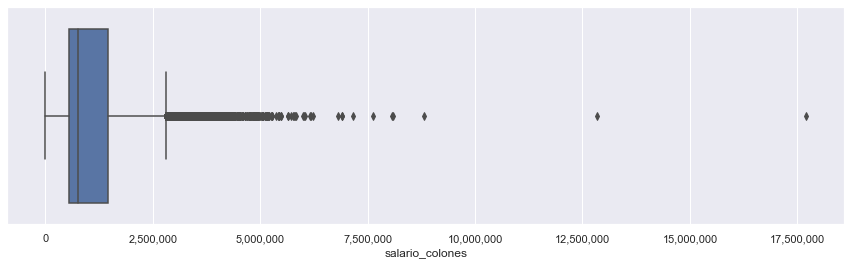

In [23]:
plt.figure(figsize=(15,4))

sns.boxplot(data=df,x='salario_colones')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

Empecemos por conocer cual es el rango salarial total.

Como vemos en el boxplot anterior el salario reportado para el empleado que peor gana de la CCSS es muy cercano a 0, de 37 colones para ser exacto. Mientras que el salario de la persona que mas gana esta ligeramente arriba de los 17.5 millones de colones

Dejemos los valores extremos por fuera y veamos cuanto se ganan la mayoria de los empleados de la CCSS

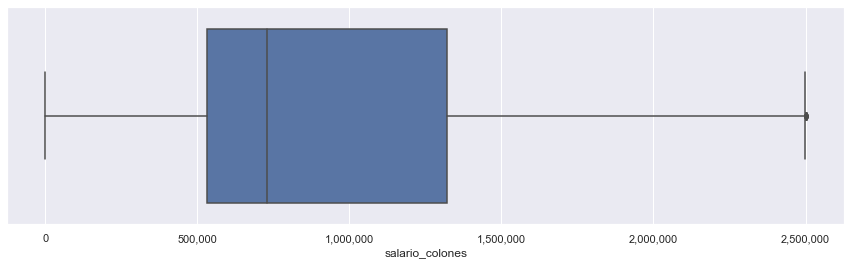

In [24]:
plt.figure(figsize=(15,4))

sns.boxplot(data=df[df['salario_colones'] < df['salario_colones'].quantile(0.95)],x='salario_colones')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

### Ahora veamoslo por categoria

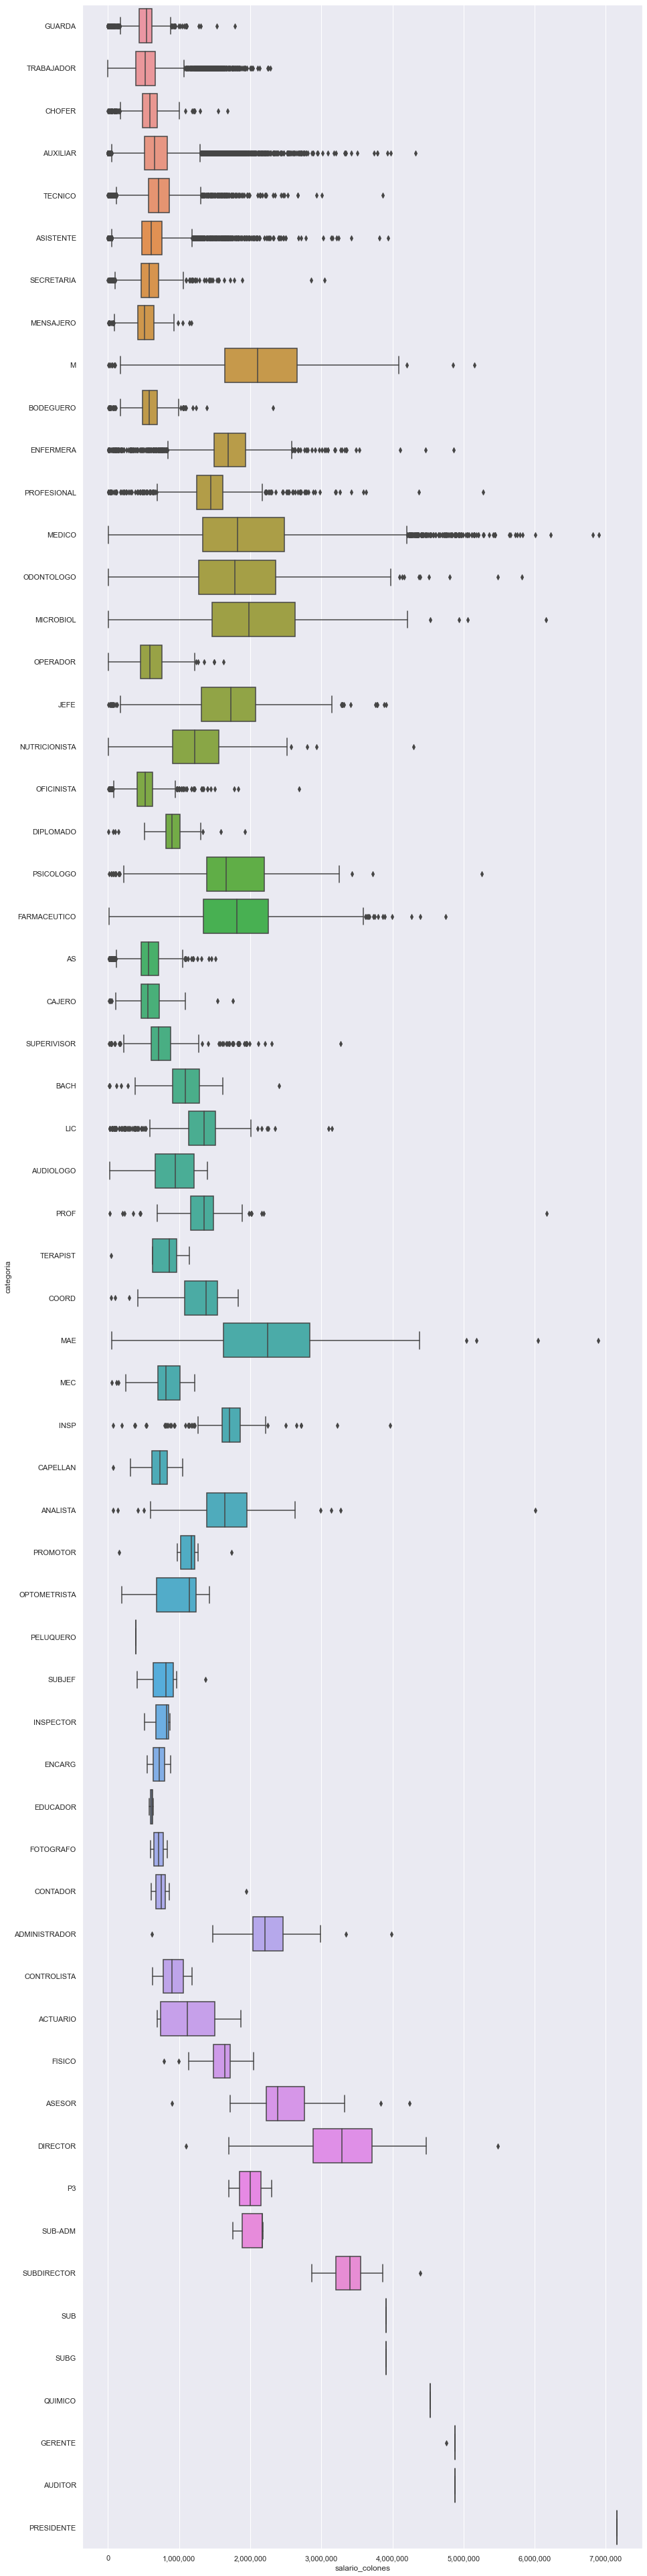

In [25]:
plt.figure(figsize=(15,70))

sns.boxplot(data=df[df['salario_colones'] < 7500000],x='salario_colones',y='categoria')

formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

In [54]:
# Ordenamos por categoria que tiene mas empleados y su ingreso promedio
cuenta = df.groupby('categoria')['salario_colones'].agg(Ingreso_promedio='mean', recuento_empleados='count').sort_values('recuento_empleados', ascending = False)
cuenta

,Ingreso_promedio,recuento_empleados
categoria,,
ASISTENTE,"612,408",11388
AUXILIAR,"705,219",11347
MEDICO,"1,966,169",7499
TECNICO,"706,100",6176
TRABAJADOR,"556,896",4312
ENFERMERA,"1,683,872",4123
PROFESIONAL,"1,428,869",2513
SECRETARIA,"579,328",1713
AS,"568,766",1616


#### Para analisar mas a detalle cada categoria con sus titulos podemos filtrar el dataframe

In [89]:
# Creamos un dataframe filtrado por la categoria que nos intereza analisar en profundidad
categoria_filtrar = 'AUXILIAR'

df_filtrado = df[df['categoria'] == categoria_filtrar]
df_filtrado = df_filtrado.reset_index(drop = True)
df_filtrado

,nombre,puesto,salario_colones,categoria,titulo
0,Miriam Rodriguez Mendez,AUX. LAB.CLINICO,38,AUXILIAR,LAB.CLINICO
1,Maria Victoria Vargas Leiva,AUX. DE ENFERMERIA,113,AUXILIAR,DE ENFERMERIA
2,Yensi Marchena Anchia,AUX. DE ENFERMERIA,151,AUXILIAR,DE ENFERMERIA
3,Katherine Priscilla Alvarado Carmona,AUXILIAR DE NUTRIC,191,AUXILIAR,DE NUTRIC
4,Maria Fernanda Bravo Gonzalez,AUX. DE ENFERMERIA,227,AUXILIAR,DE ENFERMERIA
...,...,...,...,...,...
11342,Alexandra Carrillo Montiel,AUX. DE ENFERMERIA,"3,787,892",AUXILIAR,DE ENFERMERIA
11343,Luis Gerardo Quesada Estrada,AUX. DE ENFERMERIA,"3,789,700",AUXILIAR,DE ENFERMERIA
11344,Monica Fernanda Sabatier Carmona,AUX. DE ENFERMERIA,"3,927,827",AUXILIAR,DE ENFERMERIA
11345,Marilyn De Los Angeles Hidalgo Castillo,AUX. DE ENFERMERIA,"3,976,108",AUXILIAR,DE ENFERMERIA


In [90]:
titulos = df_filtrado.groupby('titulo')['salario_colones'].agg(Ingreso_promedio='mean', recuento_empleados='count').sort_values('Ingreso_promedio', ascending = False)
titulos

,Ingreso_promedio,recuento_empleados
titulo,,
LABOR.EXPERIMEN,"941,827",1
DE ENFERMERIA,"743,316",9032
RADIOLOGIA,"686,655",95
FISIOTERAPIA,"643,714",16
DISECCION,"628,294",25
DE QUIROFANOS,"621,046",523
LAB.CLINICO,"589,479",348
TERAP.RESPIRAT.,"585,379",25
CONTABILIDAD,"552,098",4


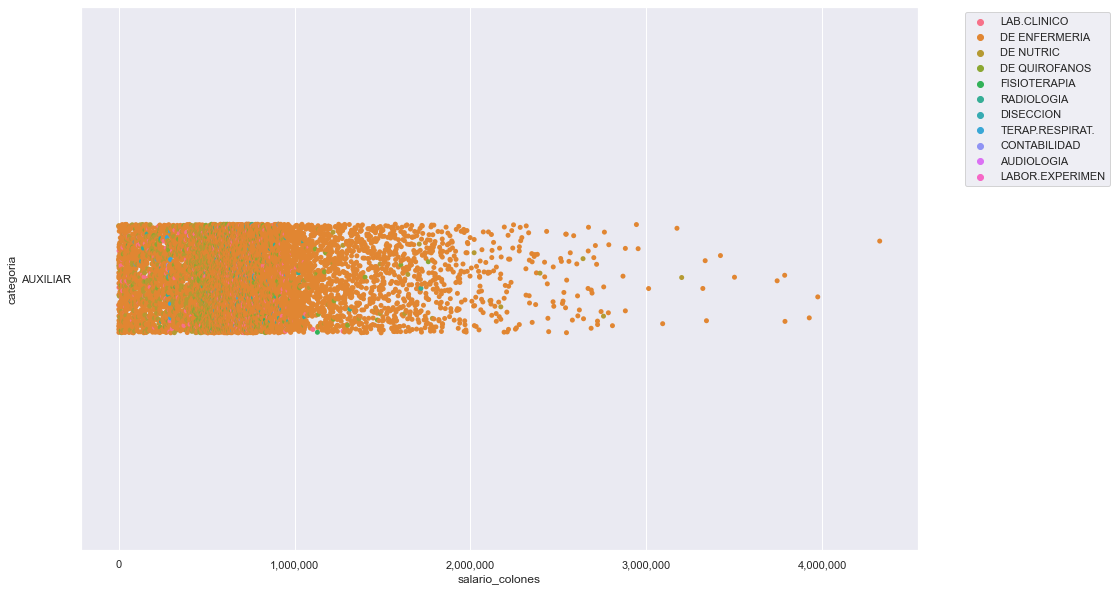

In [92]:
# Establecemos el tamaño de la grafica
plt.figure(figsize=(15,10))

sns.stripplot(data = df_filtrado,y = 'categoria', x = 'salario_colones', hue = 'titulo')

# Configurar los separadores de miles en el eje x
formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)

# Sacamos la leyenda del grafico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 1.0, 'Rangos salariales de AUXILIAR segun su especialidad')

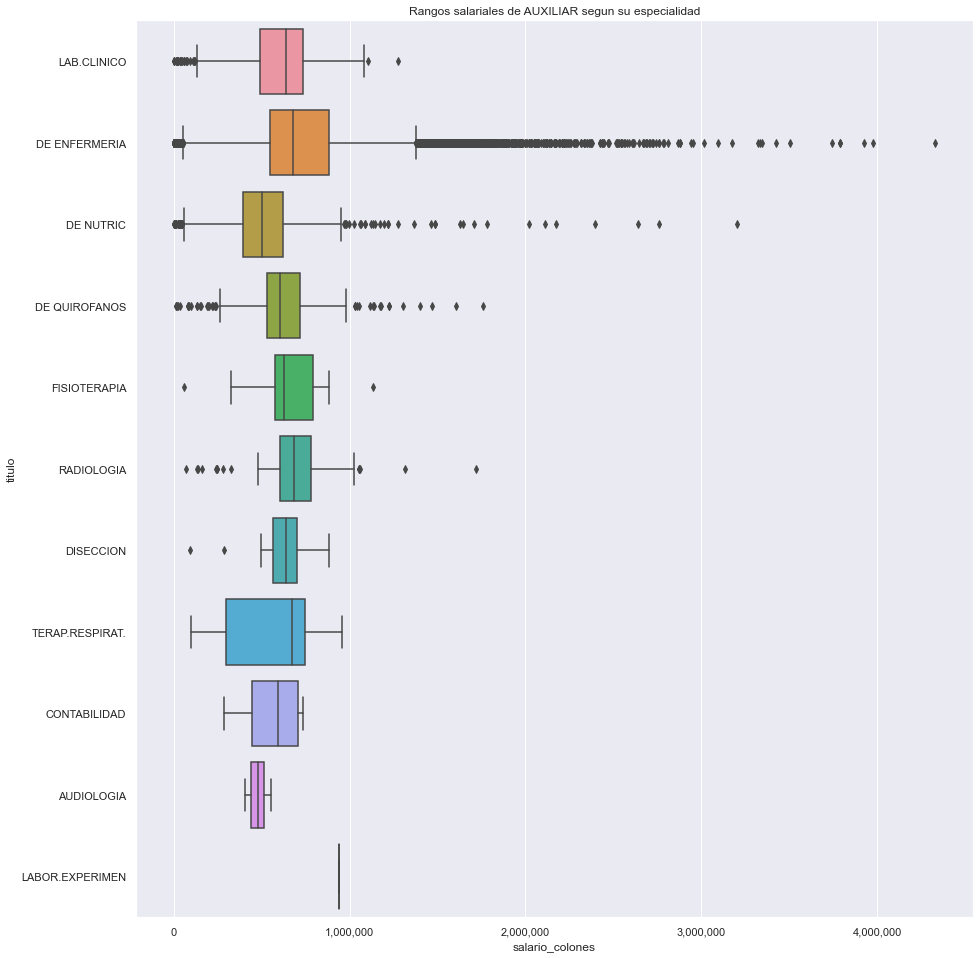

In [93]:
# Establecemos el tamaño de la grafica
canti_tit  = df_filtrado['titulo'].nunique()*1.5

plt.figure(figsize=(15,canti_tit))

sns.boxplot(data = df_filtrado,y = 'titulo', x = 'salario_colones')

# Configurar los separadores de miles en el eje x
formateador = ticker.StrMethodFormatter("{x:,.0f}")
plt.gca().xaxis.set_major_formatter(formateador)
plt.title(f'Rangos salariales de {categoria_filtrar} segun su especialidad')